# アタポン
* アタポンのデータに絞る
* ちょうど毎月開催されてるので、月次にしてみる
  * 「月の中で何日に開催された」とかは一旦考慮しない
* とりあえずpystan動かしてみる
  * 試しにローカルレベルモデルで動かす

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../event_data/'

In [5]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].set_index('日付')
df

,イベント,2001位,形式,属性,期間
日付,,,,,
2015-09-25,アタシポンコツアンドロイド,78330,アタポン,NaN,249.0
2015-10-19,Nation Blue,67627,アタポン,NaN,198.0
2015-11-20,Orange Sapphire,42944,アタポン,NaN,150.0
2015-12-18,Snow Wings,50954,アタポン,NaN,222.0
2016-01-20,パステルピンクな恋,43854,アタポン,NaN,174.0
2016-02-18,オルゴールの小箱,56737,アタポン,NaN,174.0
2016-03-20,絶対特権主張しますっ！,51353,アタポン,NaN,174.0
2016-04-19,つぼみ,47907,アタポン,NaN,174.0
2016-05-19,明日また会えるよね,58517,アタポン,NaN,198.0


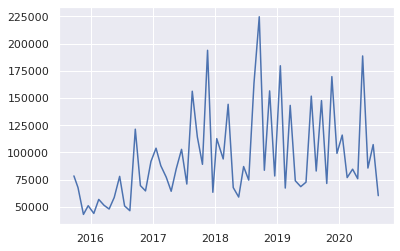

In [8]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.index
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## stanデータ準備

In [11]:
# データ（辞書型）
dat = {
    'T':       len(df),         # 全日付の日数
    'y':       df['2001位'].tolist(), # 観測値
}

In [12]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  vector[T] y;       // 観測値
}
parameters {
  vector[T] mu;
  real<lower=0> s_w;
  real<lower=0> s_v;
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
    y[i] ~ normal(mu[i], s_v);
  }
}
"""

# Stan実行

In [13]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9cc615073c76f7ff6f48a585e7177de5 NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmpc_l3wryg\stanfit4anon_model_9cc615073c76f7ff6f48a585e7177de5_2927865332933288212.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 22.3 s


In [15]:
# パラメータ設定
n_itr = 5000
n_warmup = n_itr - 1000
chains = 3

In [16]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 6.19 s


In [17]:
# fit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'c1_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


In [18]:
# 読み込み
with open(save_dir + 'c1_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [19]:
fit

Inference for Stan model: anon_model_9cc615073c76f7ff6f48a585e7177de5.
3 chains, each with iter=5000; warmup=4000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]   6.2e4  840.32  1.8e4  2.4e4  4.9e4  6.2e4  7.4e4  9.6e4    483   1.01
mu[1]   6.2e4  807.79  1.7e4  3.0e4  5.1e4  6.2e4  7.3e4  9.3e4    418   1.02
mu[2]   6.1e4  864.64  1.6e4  3.0e4  5.1e4  6.2e4  7.2e4  9.2e4    333   1.02
mu[3]   6.1e4   869.6  1.5e4  3.0e4  5.2e4  6.1e4  7.1e4  9.1e4    304   1.02
mu[4]   6.2e4  881.64  1.5e4  3.3e4  5.2e4  6.2e4  7.1e4  9.1e4    274   1.02
mu[5]   6.3e4  780.68  1.4e4  3.5e4  5.3e4  6.3e4  7.2e4  9.1e4    329   1.02
mu[6]   6.4e4  759.65  1.4e4  3.7e4  5.5e4  6.4e4  7.3e4  9.2e4    326   1.02
mu[7]   6.5e4  714.91  1.3e4  3.8e4  5.7e4  6.5e4  7.4e4  9.1e4    343   1.02
mu[8]   6.7e4  661.76  1.3e4  4.0e4  5.9e4  6.8e4  7.6e4  9.2e4    387   1.02
mu[9]   6.9e4  589.21  1.3e4  4

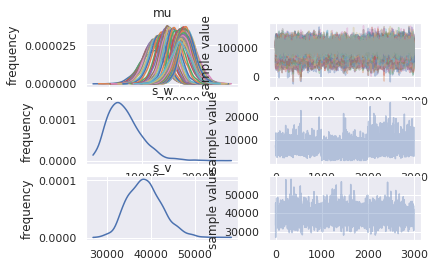

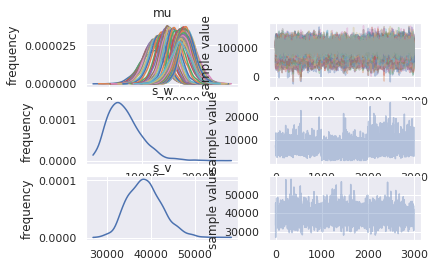

In [20]:
fit.plot()

In [22]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.index

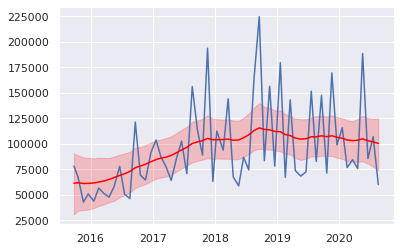

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X, mu_mean, label='predicted trend', c='red')
plt.fill_between(X, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

全然当たっていないが、とりあえず中心あたりは通ってる気がする